# Name

Yuting Kou, Yizhou Wang, Yiming Xu, Ziyi Zhou

## Content

## Method

## Toy Example

In [1]:
import matplotlib.pyplot as plt
from autograd import numpy as np

from src.Inference import Inference
from src.Subspace import Subspace
from src.model import Model
from src.util import hidecode
# hidecode()            % --------- remember to remove comments after finishing all the code. This function can simplify the code

In [11]:
data = np.load(r'.\example\data.npy')
x, y = data[:, 0], data[:, 1]

alpha = 1
c = 0
h = lambda x: np.exp(-alpha * (x - c) ** 2)

###neural network model design choices
width = 5
hidden_layers = 2
input_dim = 1
output_dim = 1

architecture = {'width': width,
                'hidden_layers': hidden_layers,
                'input_dim': input_dim,
                'output_dim': output_dim,
                'activation_fn_type': 'rbf',
                'activation_fn_params': 'c=0, alpha=1',
                'activation_fn': h}

# set random state to make the experiments replicable
rand_state = 127
random = np.random.RandomState(rand_state)

# create a model and train the model
my_nn = Model.create(submodel_type="Feedforward", architecture=architecture)

# use MSE result as params_init
params = {'step_size': 1e-3,
          'max_iteration': 5000,
          'random_restarts': 1}

my_nn.fit(x_train=x.reshape((1, -1)), y_train=y.reshape((1, -1)), params=params)

Iteration 0 lower bound 819.7961258523592; gradient mag: 1898.8184781753616
Iteration 100 lower bound 276.8416713913879; gradient mag: 905.8138617920829
Iteration 200 lower bound 146.60544634636807; gradient mag: 243.20643709289612
Iteration 300 lower bound 125.40402125683939; gradient mag: 114.07711224184551
Iteration 400 lower bound 112.21719062813357; gradient mag: 82.12823852714574
Iteration 500 lower bound 103.45637516777498; gradient mag: 60.82498782502768
Iteration 600 lower bound 98.29637890350787; gradient mag: 42.62896517376393
Iteration 700 lower bound 95.27407968730793; gradient mag: 30.197081725437364
Iteration 800 lower bound 93.40503565128168; gradient mag: 22.220608010744048
Iteration 900 lower bound 92.22018631725363; gradient mag: 16.647963246857113
Iteration 1000 lower bound 91.48324289568053; gradient mag: 12.407575646468986
Iteration 1100 lower bound 91.0438907684911; gradient mag: 9.100371226172378
Iteration 1200 lower bound 90.79440500836239; gradient mag: 6.5560

Text(0, 0.5, 'Y')

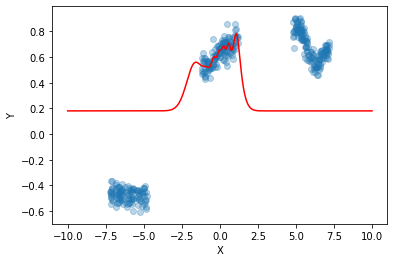

In [15]:
x_test = np.linspace(-10, 10, 1000).reshape(1,-1)
y_test = my_nn.forward(x_test, use_subweights = False, weights = my_nn.weights)[0]
plt.scatter(x, y, alpha = 0.3)
plt.plot(x_test[0], y_test[0], color = 'red')
plt.xlabel('X')
plt.ylabel('Y')


In [9]:
my_nn = Model.create(submodel_type="Feedforward", architecture=architecture)
my_subspace = Subspace.create(subspace_type="random", model=my_nn, n_subspace=2)
my_subspace.collect_vector(X=x, y=y)
P, w = my_subspace.get_space()

In [8]:
hmc_tune_params={'step_size': 1e-3,
                                'leapfrog_steps': 10,
                                'total_samples': 1000,
                                'burn_in': 0.1,
                                'warm_start': True,
                                'thinning_factor': 1,
                                'mom_std': 2,
                                'diagnostic_mode': False}

In [10]:
my_inference = Inference.create(inference_type="HMC", model=my_nn, P=P, w_hat=w,  tune_params=hmc_tune_params)

In [14]:
params = {'step_size': 1e-3,
              'max_iteration': 5000,
              'random_restarts': 1}

# fit my neural network to minimize MSE on the given data
# my_nn.fit(x_train=x.reshape((1, -1)), y_train=y.reshape((1, -1)), params=params)

# get initial weights (in subspace dimension!!)
position_init = my_nn.get_z_from_W(weights=my_nn.weights, P=P, w_hat=w)

Iteration 0 lower bound 90.36988432380696; gradient mag: 0.3301824240662497
Iteration 100 lower bound 90.33361950994214; gradient mag: 0.21667837964328682
Iteration 200 lower bound 90.31439510721631; gradient mag: 0.10115509670111951
Iteration 300 lower bound 90.30760170221549; gradient mag: 0.057615816343131565
Iteration 400 lower bound 90.30323402506498; gradient mag: 0.04440195107267975
Iteration 500 lower bound 90.29998176561409; gradient mag: 0.03637914556624187
Iteration 600 lower bound 90.29751729128236; gradient mag: 0.030499054427263743
Iteration 700 lower bound 90.29574318977208; gradient mag: 0.113764519056356
Iteration 800 lower bound 90.29431171517265; gradient mag: 0.023552113650322445
Iteration 900 lower bound 90.29302523129255; gradient mag: 0.021010682428557297
Iteration 1000 lower bound 90.29188673757537; gradient mag: 0.018601350491520587
Iteration 1100 lower bound 90.29092257449652; gradient mag: 0.09090419437848167
Iteration 1200 lower bound 90.2902424356102; gradi

In [ ]:
my_inference.train(X=x, y=y, warm_start=False, position_init=position_init,diagnostic_mode=True)#, step_size=1e-2, leapfrog_steps=1000,
              #total_samples=10000, burn_in=0.1, thinning_factor=2, check_point=200)

potential energy change: 1610413722.5959556 1532980158.4750547
kinetic energy change: 1.9121403376415864 3911560350.691687
total energy change: 1610413724.508096 5444540509.166742



potential energy change: 1338597819.3024664 1423502706.0567298
kinetic energy change: 2.5241458349824395 592620258.1115417
total energy change: 1338597821.8266122 2016122964.1682715



potential energy change: 981598752.2082527 1024127162.1445657
kinetic energy change: 11.261313430856426 315410117.41226995
total energy change: 981598763.4695661 1339537279.5568357



potential energy change: 1601530515.444015 1567498523.7302926
kinetic energy change: 2.3272206861109077 830464946.152611
total energy change: 1601530517.7712357 2397963469.8829036



potential energy change: 1143906514.4820602 1133069181.876838
kinetic energy change: 2.320695099386919 468615422.506692
total energy change: 1143906516.8027554 1601684604.38353



potential energy change: 818986061.7790786 811391085.1514337
kinetic energy change: 1

potential energy change: 48663387171756.27 53962528776196.375
kinetic energy change: 9.19610309426649 10295850006369.812
total energy change: 48663387171765.47 64258378782566.19



potential energy change: 36915885574262.6 40946691592008.14
kinetic energy change: 4.854618466101685 7792203948737.994
total energy change: 36915885574267.45 48738895540746.13



potential energy change: 28008350752995.082 31074333737904.418
kinetic energy change: 2.3591383414377143 5898969104867.801
total energy change: 28008350752997.44 36973302842772.22



potential energy change: 21253056689617.24 23585120641785.758
kinetic energy change: 3.656007243392647 4466890833635.892
total energy change: 21253056689620.895 28052011475421.65



potential energy change: 16129138179626.824 17902939626722.574
kinetic energy change: 5.242068735308487 3383317326702.2314
total energy change: 16129138179632.066 21286256953424.805



potential energy change: 12242030048908.773 13591188648099.037
kinetic energy change: 8.61

In [ ]:

# get posterior z
n_sample = 10
post_sample = my_inference.get_posterior(n_samples=n_sample).reshape(-1, 2)
x_test = np.linspace(-8, 8, 100)
y_test = np.reshape(
    [my_nn.forward(P=P, w_hat=w, z=post_sample[i], X=x_test.reshape(1, -1)) for i in range(n_sample)],
    (n_sample, -1)) \
         + np.random.normal(0, my_nn.Sigma_Y_det ** 0.5, size=(n_sample, len(x_test)))
# because here Sigma_Y is 1-D, so determinants=its value

In [ ]:
# plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.title('Posterior Predictive of Bayesian NN |HMC')
# plt.ylim(-15, 15)
for i in range(n_sample):
    plt.plot(x_test, y_test[i], color='red', alpha=max(1 / n_sample, 0.1))
plt.scatter(x, y, color='black', label='data')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(x, y, color='black')
plt.plot(x_test, y_test.mean(0), color='red', label='posterior predictive mean')
plt.fill_between(x_test, np.percentile(y_test, 0.25, axis=0), np.percentile(y_test, 97.5, axis=0),
                 color='red', label='95% CI', alpha=0.5)
plt.legend(loc='best')
plt.title('Posterior Predictive of Bayesian NN with 95% CI|HMC')
plt.grid()
# plt.ylim(-15, 15)
plt.show()